In [1]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


# Importing Liabraries

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.8/750.8 kB 15.8 MB/s eta 0:00:00


In [3]:
# Importing the required libraries
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns
import yaml
import matplotlib.patches as patches
import torchvision.transforms as transforms

sns.set_style('darkgrid')

In [4]:
import yaml

# Define the dataset information
dataset_info = {
    'train': '/kaggle/input/dota-yolo/DOTA/images/train',
    'val': '/kaggle/input/dota-yolo/DOTA/images/val',
    'test': '/kaggle/input/dota-yolo/DOTA/images/val',
    'nc': 16,
    'names': ['plane', 'baseball-diamond', 'bridge', 'ground-track-field', 'small-vehicle', 'large-vehicle', 'ship', 'tennis-court', 'basketball-court', 'storage-tank', 'soccer-ball-field', 'roundabout', 'harbor', 'swimming-pool', 'helicopter', 'container-crane']
}

# Create and save the data.yaml file
data_yaml_path = '/kaggle/working/data.yaml'
with open(data_yaml_path, 'w') as yaml_file:
    yaml.dump(dataset_info, yaml_file, default_flow_style=False)

# Data Visualization

In [5]:
# # Define the paths to the images and labels directories
# train_images = "/kaggle/input/dota-yolo/DOTA/images/train"
# train_labels = "/kaggle/input/dota-yolo/DOTA/labels/val"

# # test_images = "/kaggle/input/satyolo8/test/images"
# # test_labels = "/kaggle/input/satyolo8/labels"

# # val_images = "/kaggle/input/satyolo8/images"
# # val_labels = "/kaggle/input/satyolo8/labels"

# # Load class information from the YAML file
# yaml_path = "/kaggle/working/data.yaml"
# with open(yaml_path, "r") as f:
#     data = yaml.load(f, Loader=yaml.FullLoader)
# classes = data["names"]

# # Get a list of all the image files in the training images directory
# image_files = os.listdir(train_images)

# # Choose 16 random image files from the list
# random_images = random.sample(image_files, 16)

# # Set up the plot
# fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# # Function to generate a random color
# def random_color():
#     return tuple(random.randint(0, 255) for _ in range(3))

# # Assign different colors to each class
# class_colors = {class_name: random_color() for class_name in classes}

# # Loop over the random images and plot the object detections
# for i, image_file in enumerate(random_images):
#     row = i // 4
#     col = i % 4
    
#     # Load the image
#     image_path = os.path.join(train_images, image_file)
#     image = cv2.imread(image_path)

#     # Load the labels for this image
#     label_file = os.path.splitext(image_file)[0] + ".txt"
#     label_path = os.path.join(train_labels, label_file)
#     with open(label_path, "r") as f:
#         labels = f.read().strip().split("\n")

#     # Loop over the labels and plot the object detections
#     for label in labels:
#         if len(label.split()) != 5:
#             continue
#         class_id, x_center, y_center, width, height = map(float, label.split())
#         x_min = int((x_center - width/2) * image.shape[1])
#         y_min = int((y_center - height/2) * image.shape[0])
#         x_max = int((x_center + width/2) * image.shape[1])
#         y_max = int((y_center + height/2) * image.shape[0])
        
#         # Use the color assigned to the class
#         color = class_colors[classes[int(class_id)]]
        
#         # Draw the rectangle with the assigned color
#         cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, 3)
        
#         # Add class label to the rectangle
#         class_name = classes[int(class_id)]
#         cv2.putText(image, class_name, (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

#     # Show the image with the object detections
#     axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#     axs[row, col].axis('off')

# plt.show()


In [6]:
# import os
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from collections import Counter

# def parse_yolov8_annotations(annotation_path):
#     annotations = []
#     with open(annotation_path, 'r') as file:
#         for line in file:
#             line = line.strip().split()
#             class_label = int(line[0])
#             annotations.append(class_label)
#     return annotations

# # Replace these paths with your actual paths
# train_path = "/kaggle/input/satyolo8/train/labels/"
# valid_path = "/kaggle/input/satyolo8/valid/labels/"
# test_path = "/kaggle/input/satyolo8/test/labels/"

# # Load annotations for train, validation, and test sets
# train_annotations = []
# valid_annotations = []
# test_annotations = []

# for file_name in os.listdir(train_path):
#     train_annotations.extend(parse_yolov8_annotations(os.path.join(train_path, file_name)))

# for file_name in os.listdir(valid_path):
#     valid_annotations.extend(parse_yolov8_annotations(os.path.join(valid_path, file_name)))

# for file_name in os.listdir(test_path):
#     test_annotations.extend(parse_yolov8_annotations(os.path.join(test_path, file_name)))

# # Convert to Pandas DataFrame
# train_df = pd.DataFrame({'class': train_annotations})
# valid_df = pd.DataFrame({'class': valid_annotations})
# test_df = pd.DataFrame({'class': test_annotations})

# # Plot class distribution for train set
# plt.figure(figsize=(18, 6))

# plt.subplot(1, 3, 1)
# sns.countplot(x='class', data=train_df)
# plt.title('Train Set Class Distribution')
# plt.xlabel('Class')
# plt.ylabel('Count')
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# # Plot class distribution for validation set
# plt.subplot(1, 3, 2)
# sns.countplot(x='class', data=valid_df)
# plt.title('Validation Set Class Distribution')
# plt.xlabel('Class')
# plt.ylabel('Count')
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# # Plot class distribution for test set
# plt.subplot(1, 3, 3)
# sns.countplot(x='class', data=test_df)
# plt.title('Test Set Class Distribution')
# plt.xlabel('Class')
# plt.ylabel('Count')
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# plt.tight_layout()
# plt.show()


# Augmentation

In [7]:
# import yaml

# # Define the data dictionary
# data_dict = {
#     'train': ['/kaggle/input/satyolo8/train/images', '/kaggle/input/satyolo8/train/images'],  # Duplicate the training set
#     'val': ['/kaggle/input/satyolo8/valid/images','/kaggle/input/satyolo8/valid/images'],
#     'test': ['/kaggle/input/satyolo8/test/images','/kaggle/input/satyolo8/test/images'],
#     'nc': 11,
#     'names': ['airplane', 'boat', 'car', 'cargo ship', 'fighter jet', 'helicopter', 'jet', 'military aircraft', 'propeller plane', 'truck', 'yacht'],
#     'augmentation': {
#         'degrees': 30.0,  # rotation
#         'translate': 0.3,  # translation
#         'scale': 0.5,  # scale
#         'shear': 5.0  # shear
#     }
# }

# # Save the data dictionary to a YAML file
# with open('/kaggle/working/data.yaml', 'w') as yaml_file:
#     yaml.dump(data_dict, yaml_file, default_flow_style=False)


# Building & Training Model

In [8]:
#disable wandb
import os
os.environ["WANDB_DISABLED"] = "true"

In [9]:
# Loading a pretrained model
model = YOLO('yolov8x.pt')

# Training the model with data augmentation
model.train(data='/kaggle/working/data.yaml',
            epochs=100,
            imgsz=224,
            seed=42,
            batch=8,
            workers=4,
            project='yolo8',
            name='result')


100%|██████████| 131M/131M [00:00<00:00, 262MB/s]


Ultralytics YOLOv8.2.1 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/working/data.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=4, project=yolo8, name=result, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

100%|██████████| 755k/755k [00:00<00:00, 21.5MB/s]
2024-04-18 18:06:45,553	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-04-18 18:06:46,317	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-04-18 18:06:48.820852: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-18 18:06:48.820964: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-18 18:06:48.967384: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS facto

Overriding model.yaml nc=80 with nc=16

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytic

wandb: Tracking run with wandb version 0.16.5
wandb: W&B syncing is set to `offline` in this directory.  
wandb: Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 120MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/dota-yolo/DOTA/labels/train... 1411 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1411/1411 [00:48<00:00, 29.30it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/dota-yolo/DOTA/labels is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/dota-yolo/DOTA/labels/val... 458 images, 0 backgrounds, 0 corrupt: 100%|██████████| 458/458 [00:16<00:00, 27.07it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/dota-yolo/DOTA/labels is not writeable, cache not saved.
Plotting labels to yolo8/result/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0005, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 4 dataloader workers
Logging results to yolo8/result
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.46G      2.393      2.333      1.165        131        224: 100%|██████████| 177/177 [01:33<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:23<00:00,  1.25it/s]

                   all        458      69565      0.431      0.101      0.102     0.0549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.45G      2.204      1.478      1.053         80        224: 100%|██████████| 177/177 [01:31<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.27it/s]


                   all        458      69565      0.454      0.113      0.114     0.0604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.51G      2.224      1.493      1.049        100        224: 100%|██████████| 177/177 [01:31<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.28it/s]


                   all        458      69565      0.415       0.12      0.122     0.0636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.43G      2.209      1.413      1.038        278        224: 100%|██████████| 177/177 [01:30<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:20<00:00,  1.39it/s]


                   all        458      69565      0.429      0.137       0.14      0.073

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.41G      2.157      1.375      1.023        247        224: 100%|██████████| 177/177 [01:30<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.28it/s]


                   all        458      69565      0.513      0.146      0.153     0.0799

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.48G       2.11      1.322      1.003         61        224: 100%|██████████| 177/177 [01:29<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:23<00:00,  1.24it/s]


                   all        458      69565      0.555      0.139      0.149     0.0795

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.43G       2.09      1.301     0.9973        189        224: 100%|██████████| 177/177 [01:32<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.30it/s]


                   all        458      69565       0.59      0.147      0.154     0.0822

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.45G      2.072      1.257      0.983        239        224: 100%|██████████| 177/177 [01:32<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.30it/s]


                   all        458      69565      0.516      0.151      0.151     0.0823

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.51G      2.035      1.253     0.9804         37        224: 100%|██████████| 177/177 [01:33<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.31it/s]


                   all        458      69565        0.5      0.161      0.166     0.0892

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.52G      2.004      1.212     0.9664        151        224: 100%|██████████| 177/177 [01:30<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.30it/s]


                   all        458      69565      0.591      0.152       0.16     0.0874

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.77G      1.989      1.189     0.9644        170        224: 100%|██████████| 177/177 [01:30<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:23<00:00,  1.25it/s]


                   all        458      69565      0.609      0.168      0.176     0.0938

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.55G      1.945      1.153     0.9523         88        224: 100%|██████████| 177/177 [01:31<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:21<00:00,  1.33it/s]


                   all        458      69565      0.635      0.167      0.183     0.0999

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       2.5G      1.904      1.121      0.943        196        224: 100%|██████████| 177/177 [01:30<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.30it/s]


                   all        458      69565      0.635       0.17      0.176     0.0954

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.57G      1.901      1.104     0.9528         76        224: 100%|██████████| 177/177 [01:32<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.28it/s]


                   all        458      69565      0.562      0.169      0.175     0.0963

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.49G      1.919      1.114     0.9564        178        224: 100%|██████████| 177/177 [01:31<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.27it/s]


                   all        458      69565      0.565      0.168      0.179     0.0989

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.56G       1.86      1.092     0.9407         68        224: 100%|██████████| 177/177 [01:34<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:21<00:00,  1.33it/s]


                   all        458      69565      0.657      0.171      0.182     0.0998

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.53G      1.836      1.052     0.9369        346        224: 100%|██████████| 177/177 [01:31<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.30it/s]


                   all        458      69565      0.657       0.17      0.186      0.105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       2.5G      1.847      1.058     0.9315         89        224: 100%|██████████| 177/177 [01:31<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.29it/s]


                   all        458      69565      0.624      0.169      0.192      0.109

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.47G      1.782      1.025     0.9305        212        224: 100%|██████████| 177/177 [01:31<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:23<00:00,  1.25it/s]

                   all        458      69565      0.584      0.176      0.192      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.43G      1.811      1.023     0.9216         65        224: 100%|██████████| 177/177 [01:31<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.27it/s]


                   all        458      69565      0.581      0.188      0.197      0.109

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.52G      1.745     0.9876      0.923        519        224: 100%|██████████| 177/177 [01:30<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.31it/s]


                   all        458      69565       0.65      0.184      0.199      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.56G      1.776     0.9968     0.9247        448        224: 100%|██████████| 177/177 [01:31<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.31it/s]


                   all        458      69565      0.644       0.18        0.2      0.115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.52G      1.795       1.01     0.9255        149        224: 100%|██████████| 177/177 [01:33<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.29it/s]


                   all        458      69565      0.642      0.186      0.196      0.111

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.53G      1.754     0.9933     0.9256        777        224: 100%|██████████| 177/177 [01:31<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.31it/s]


                   all        458      69565      0.596      0.186      0.203      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.55G      1.765      0.985     0.9202        206        224: 100%|██████████| 177/177 [01:33<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.30it/s]


                   all        458      69565      0.634      0.185        0.2      0.113

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.57G      1.718     0.9721     0.9192        427        224: 100%|██████████| 177/177 [01:33<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:21<00:00,  1.32it/s]


                   all        458      69565      0.648      0.193      0.206      0.119

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.47G      1.691     0.9491     0.9113         97        224: 100%|██████████| 177/177 [01:31<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:21<00:00,  1.34it/s]


                   all        458      69565      0.661      0.193       0.21      0.121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.43G      1.726     0.9597     0.9099        262        224: 100%|██████████| 177/177 [01:32<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.26it/s]


                   all        458      69565      0.591      0.189      0.198      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.45G      1.642      0.901     0.9008        114        224: 100%|██████████| 177/177 [01:33<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:23<00:00,  1.22it/s]


                   all        458      69565      0.642      0.193      0.205      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.56G      1.678     0.9323     0.9089         79        224: 100%|██████████| 177/177 [01:30<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.27it/s]


                   all        458      69565      0.673      0.194      0.212      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.52G      1.675     0.9285     0.9126        278        224: 100%|██████████| 177/177 [01:31<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.27it/s]


                   all        458      69565      0.619      0.194      0.209      0.121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.46G      1.662     0.9233     0.9035        122        224: 100%|██████████| 177/177 [01:34<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.30it/s]


                   all        458      69565      0.611      0.194      0.207       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.46G      1.627     0.8909     0.9027        165        224: 100%|██████████| 177/177 [01:33<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:23<00:00,  1.26it/s]


                   all        458      69565      0.624      0.195      0.213       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.46G      1.612     0.8747     0.8963        160        224: 100%|██████████| 177/177 [01:30<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:21<00:00,  1.35it/s]


                   all        458      69565      0.631      0.187      0.212      0.121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.58G       1.63     0.8989     0.9007        112        224: 100%|██████████| 177/177 [01:33<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:21<00:00,  1.32it/s]


                   all        458      69565      0.612      0.204      0.219      0.127

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.45G      1.604     0.8819     0.8973        712        224: 100%|██████████| 177/177 [01:34<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.28it/s]


                   all        458      69565      0.664      0.195      0.216      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.57G      1.631     0.8778     0.8916         92        224: 100%|██████████| 177/177 [01:34<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:21<00:00,  1.36it/s]


                   all        458      69565       0.66      0.195      0.217      0.126

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.55G      1.622     0.8766      0.896        487        224: 100%|██████████| 177/177 [01:35<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:23<00:00,  1.26it/s]


                   all        458      69565      0.617      0.199      0.214      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.55G      1.609     0.8816     0.8947        161        224: 100%|██████████| 177/177 [01:33<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.28it/s]

                   all        458      69565      0.735      0.189      0.219      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.54G      1.589     0.8711      0.892         93        224: 100%|██████████| 177/177 [01:36<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.31it/s]


                   all        458      69565      0.651      0.198      0.221      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.63G      1.563     0.8369      0.887        131        224: 100%|██████████| 177/177 [01:33<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:23<00:00,  1.25it/s]


                   all        458      69565      0.696      0.196      0.221      0.128

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.47G      1.574     0.8352     0.8884        167        224: 100%|██████████| 177/177 [01:32<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:24<00:00,  1.21it/s]


                   all        458      69565      0.682      0.203      0.224       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100       2.5G       1.58     0.8428     0.8857        333        224: 100%|██████████| 177/177 [01:31<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.30it/s]


                   all        458      69565      0.644      0.208      0.226       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.56G      1.571     0.8321     0.8838        275        224: 100%|██████████| 177/177 [01:32<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:25<00:00,  1.15it/s]


                   all        458      69565      0.608      0.203      0.226      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.46G      1.556     0.8218     0.8807        140        224: 100%|██████████| 177/177 [01:30<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.29it/s]


                   all        458      69565      0.582      0.214      0.229      0.136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.55G      1.558     0.8276     0.8818        159        224: 100%|██████████| 177/177 [01:30<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:23<00:00,  1.26it/s]


                   all        458      69565       0.68      0.196      0.224      0.131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.46G      1.504     0.7982      0.882         78        224: 100%|██████████| 177/177 [01:32<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:23<00:00,  1.25it/s]


                   all        458      69565      0.673      0.195       0.22      0.127

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.58G      1.553     0.8193     0.8827        176        224: 100%|██████████| 177/177 [01:31<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:23<00:00,  1.25it/s]


                   all        458      69565      0.662      0.196      0.222      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.54G       1.51     0.8059     0.8822         73        224: 100%|██████████| 177/177 [01:35<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:21<00:00,  1.33it/s]


                   all        458      69565      0.637      0.196      0.221      0.131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.46G      1.544     0.8141     0.8826         78        224: 100%|██████████| 177/177 [01:33<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:23<00:00,  1.25it/s]


                   all        458      69565      0.603      0.205      0.224      0.131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.52G      1.521      0.793     0.8766         97        224: 100%|██████████| 177/177 [01:34<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.27it/s]


                   all        458      69565      0.607      0.202      0.227      0.136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.58G       1.49     0.7764     0.8767        487        224: 100%|██████████| 177/177 [01:32<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.31it/s]


                   all        458      69565      0.617      0.198      0.221      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.46G      1.504     0.7852     0.8754        353        224: 100%|██████████| 177/177 [01:34<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:23<00:00,  1.24it/s]


                   all        458      69565      0.618      0.201      0.226      0.134

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.45G      1.516     0.8015     0.8746        337        224: 100%|██████████| 177/177 [01:32<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.30it/s]


                   all        458      69565      0.641      0.198      0.222      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.46G      1.471     0.7727     0.8649        105        224: 100%|██████████| 177/177 [01:33<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.31it/s]

                   all        458      69565      0.642      0.203      0.229      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.63G      1.473     0.7756     0.8715        379        224: 100%|██████████| 177/177 [01:31<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:21<00:00,  1.32it/s]


                   all        458      69565      0.597      0.212      0.229      0.137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.44G      1.477     0.7751     0.8732        190        224: 100%|██████████| 177/177 [01:32<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:23<00:00,  1.26it/s]


                   all        458      69565      0.564      0.213      0.229      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       2.5G      1.484     0.7601     0.8699        169        224: 100%|██████████| 177/177 [01:34<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.27it/s]


                   all        458      69565      0.646      0.199      0.224      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.62G       1.48     0.7676     0.8742        123        224: 100%|██████████| 177/177 [01:35<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.31it/s]


                   all        458      69565      0.622      0.209      0.228      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.57G      1.449     0.7517     0.8697        167        224: 100%|██████████| 177/177 [01:35<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.31it/s]


                   all        458      69565      0.641      0.208      0.228      0.137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.59G       1.46     0.7593     0.8675        292        224: 100%|██████████| 177/177 [01:33<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.29it/s]


                   all        458      69565      0.639      0.208      0.229      0.137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.44G      1.463     0.7633       0.87        190        224: 100%|██████████| 177/177 [01:35<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.28it/s]


                   all        458      69565      0.659       0.21       0.23      0.136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.55G      1.449     0.7501     0.8657        161        224: 100%|██████████| 177/177 [01:33<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.29it/s]


                   all        458      69565       0.64      0.209      0.233      0.138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.46G      1.431     0.7431     0.8646        189        224: 100%|██████████| 177/177 [01:32<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.29it/s]


                   all        458      69565      0.561      0.208      0.232      0.138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.59G      1.429     0.7291     0.8647         32        224: 100%|██████████| 177/177 [01:32<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:23<00:00,  1.21it/s]


                   all        458      69565      0.662       0.21      0.231      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.56G      1.424     0.7482     0.8656        137        224: 100%|██████████| 177/177 [01:32<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:23<00:00,  1.22it/s]


                   all        458      69565      0.644      0.206      0.232      0.138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.43G      1.436     0.7351     0.8636        369        224: 100%|██████████| 177/177 [01:32<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:23<00:00,  1.25it/s]


                   all        458      69565      0.683      0.208      0.235       0.14

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.57G      1.397     0.7209     0.8585         95        224: 100%|██████████| 177/177 [01:35<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:21<00:00,  1.34it/s]


                   all        458      69565      0.624       0.21      0.233      0.139

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.45G      1.411     0.7193     0.8577         93        224: 100%|██████████| 177/177 [01:35<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.27it/s]


                   all        458      69565      0.605      0.213      0.232      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.45G        1.4     0.7138     0.8586        123        224: 100%|██████████| 177/177 [01:31<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:23<00:00,  1.25it/s]


                   all        458      69565      0.637      0.214      0.236      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.53G      1.405     0.7145     0.8583        228        224: 100%|██████████| 177/177 [01:35<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:23<00:00,  1.22it/s]

                   all        458      69565       0.68      0.209       0.24      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.53G      1.418     0.7295     0.8582        242        224: 100%|██████████| 177/177 [01:30<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:23<00:00,  1.25it/s]

                   all        458      69565      0.673      0.213      0.234      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.46G      1.403     0.7187     0.8613        120        224: 100%|██████████| 177/177 [01:34<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.28it/s]


                   all        458      69565      0.645       0.21      0.234      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.49G       1.38     0.6998      0.854        100        224: 100%|██████████| 177/177 [01:33<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.28it/s]


                   all        458      69565      0.662      0.211      0.234      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.58G      1.368     0.6993     0.8532        208        224: 100%|██████████| 177/177 [01:33<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:21<00:00,  1.33it/s]


                   all        458      69565      0.642      0.208      0.232       0.14

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.46G      1.329     0.6908     0.8551        251        224: 100%|██████████| 177/177 [01:32<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:23<00:00,  1.26it/s]


                   all        458      69565      0.674      0.208      0.235      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.56G      1.393     0.6977     0.8495         95        224: 100%|██████████| 177/177 [01:31<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:23<00:00,  1.26it/s]

                   all        458      69565      0.658      0.214      0.235      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.46G      1.362     0.7003     0.8573        286        224: 100%|██████████| 177/177 [01:32<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.28it/s]


                   all        458      69565      0.591      0.208      0.235      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.45G      1.383     0.7046     0.8554        107        224: 100%|██████████| 177/177 [01:34<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:21<00:00,  1.34it/s]


                   all        458      69565      0.624      0.213      0.239      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.46G      1.423     0.7116     0.8528        815        224: 100%|██████████| 177/177 [01:32<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.29it/s]


                   all        458      69565      0.693      0.207      0.238      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.56G      1.342     0.6778     0.8521        380        224: 100%|██████████| 177/177 [01:32<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.30it/s]


                   all        458      69565      0.649      0.217      0.242      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.56G      1.339     0.6789     0.8508        104        224: 100%|██████████| 177/177 [01:33<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:24<00:00,  1.21it/s]


                   all        458      69565      0.614      0.216      0.238      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       2.5G      1.335     0.6728     0.8508        228        224: 100%|██████████| 177/177 [01:31<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:23<00:00,  1.23it/s]


                   all        458      69565      0.651      0.213      0.242      0.146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.53G      1.313     0.6723     0.8511         69        224: 100%|██████████| 177/177 [01:30<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:20<00:00,  1.38it/s]


                   all        458      69565      0.651      0.217       0.24      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.58G      1.347     0.6792      0.848        514        224: 100%|██████████| 177/177 [01:35<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.30it/s]


                   all        458      69565      0.636       0.22      0.241      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.53G      1.333     0.6639     0.8429        180        224: 100%|██████████| 177/177 [01:37<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.30it/s]


                   all        458      69565      0.616      0.219      0.243      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.44G      1.326     0.6695      0.849        126        224: 100%|██████████| 177/177 [01:31<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:23<00:00,  1.25it/s]


                   all        458      69565      0.591      0.221      0.242      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.57G      1.303     0.6634     0.8485        119        224: 100%|██████████| 177/177 [01:31<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:23<00:00,  1.26it/s]

                   all        458      69565      0.665      0.209      0.239      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.56G      1.315     0.6665     0.8461         89        224: 100%|██████████| 177/177 [01:35<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:23<00:00,  1.24it/s]


                   all        458      69565      0.615      0.222      0.243      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.43G      1.325     0.6634     0.8455        190        224: 100%|██████████| 177/177 [01:32<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:23<00:00,  1.25it/s]


                   all        458      69565      0.614      0.221      0.245      0.147
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.59G      1.368     0.6636     0.8433         30        224: 100%|██████████| 177/177 [01:38<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.30it/s]


                   all        458      69565      0.637      0.219       0.24      0.146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.63G      1.328     0.6614     0.8377         38        224: 100%|██████████| 177/177 [01:30<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:24<00:00,  1.20it/s]

                   all        458      69565      0.635      0.219      0.241      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.56G      1.341     0.6492     0.8363         72        224: 100%|██████████| 177/177 [01:28<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.31it/s]


                   all        458      69565       0.65      0.219      0.242      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.69G      1.341     0.6528       0.84        131        224: 100%|██████████| 177/177 [01:30<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:23<00:00,  1.22it/s]


                   all        458      69565      0.641      0.218      0.242      0.146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.46G      1.298     0.6346     0.8387         97        224: 100%|██████████| 177/177 [01:29<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:20<00:00,  1.40it/s]

                   all        458      69565      0.645      0.219      0.245      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.67G      1.285     0.6321     0.8403        144        224: 100%|██████████| 177/177 [01:32<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.26it/s]


                   all        458      69565      0.642      0.218      0.244      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.57G      1.315     0.6429     0.8297         61        224: 100%|██████████| 177/177 [01:29<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.26it/s]


                   all        458      69565      0.636      0.218      0.244      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.76G      1.323     0.6399     0.8333        243        224: 100%|██████████| 177/177 [01:29<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:23<00:00,  1.25it/s]


                   all        458      69565      0.637      0.218      0.245      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.53G      1.314     0.6321     0.8357        138        224: 100%|██████████| 177/177 [01:29<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:21<00:00,  1.33it/s]


                   all        458      69565      0.629      0.218      0.243      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.76G      1.285     0.6283     0.8323         53        224: 100%|██████████| 177/177 [01:30<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:22<00:00,  1.30it/s]


                   all        458      69565      0.634      0.218      0.243      0.147

100 epochs completed in 3.327 hours.
Optimizer stripped from yolo8/result/weights/last.pt, 136.7MB
Optimizer stripped from yolo8/result/weights/best.pt, 136.7MB

Validating yolo8/result/weights/best.pt...
Ultralytics YOLOv8.2.1 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 268 layers, 68138976 parameters, 0 gradients, 257.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 1/29 [00:00<00:06,  4.01it/s]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  10%|█         | 3/29 [00:30<04:52, 11.26s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [02:02<00:00,  4.21s/it]


                   all        458      69565      0.635      0.209      0.235      0.143
                 plane        458       2550      0.715      0.285      0.339       0.18
      baseball-diamond        458        213      0.849      0.329      0.385      0.228
                bridge        458        466      0.329     0.0215     0.0208    0.00923
    ground-track-field        458        145      0.821      0.269      0.296      0.213
         small-vehicle        458      43337      0.491     0.0286     0.0698     0.0274
         large-vehicle        458       5139      0.618      0.428      0.456      0.238
                  ship        458      10765      0.585     0.0861      0.135     0.0474
          tennis-court        458        763      0.866      0.786      0.831      0.676
      basketball-court        458        143      0.405      0.217      0.213      0.127
          storage-tank        458       2940      0.625     0.0133     0.0357     0.0151
     soccer-ball-fiel

wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▃███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
wandb:                  lr/pg1 ▃███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
wandb:                  lr/pg2 ▃███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
wandb:        metrics/mAP50(B) ▁▂▃▃▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇█▇████████████
wandb:     metrics/mAP50-95(B) ▁▂▃▃▄▄▄▅▅▅▆▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇███████████
wandb:    metrics/precision(B) ▁▁▄▃▅▆▆▆▆▆▆▅▅▆▆█▇▅▇▆▅▆▅▆▆▄▇▅▇▆▆▆▅▆▅▅▆▆▆▆
wandb:       metrics/recall(B) ▁▂▃▄▅▅▅▅▆▆▆▆▆▆▆▆▆▇▆▆▇▇▇▇▇▇▇▇▇▇▇▇███████▇
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss █▇▆▆▅▅▅▅▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
wandb:          train/cls_loss █▅▄▄▃▃▃▃▂▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:          train/dfl_loss █▆▅▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁
wandb:            val/box_loss █▇▅▆▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▂▁▁▁▁

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b907e6843d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044

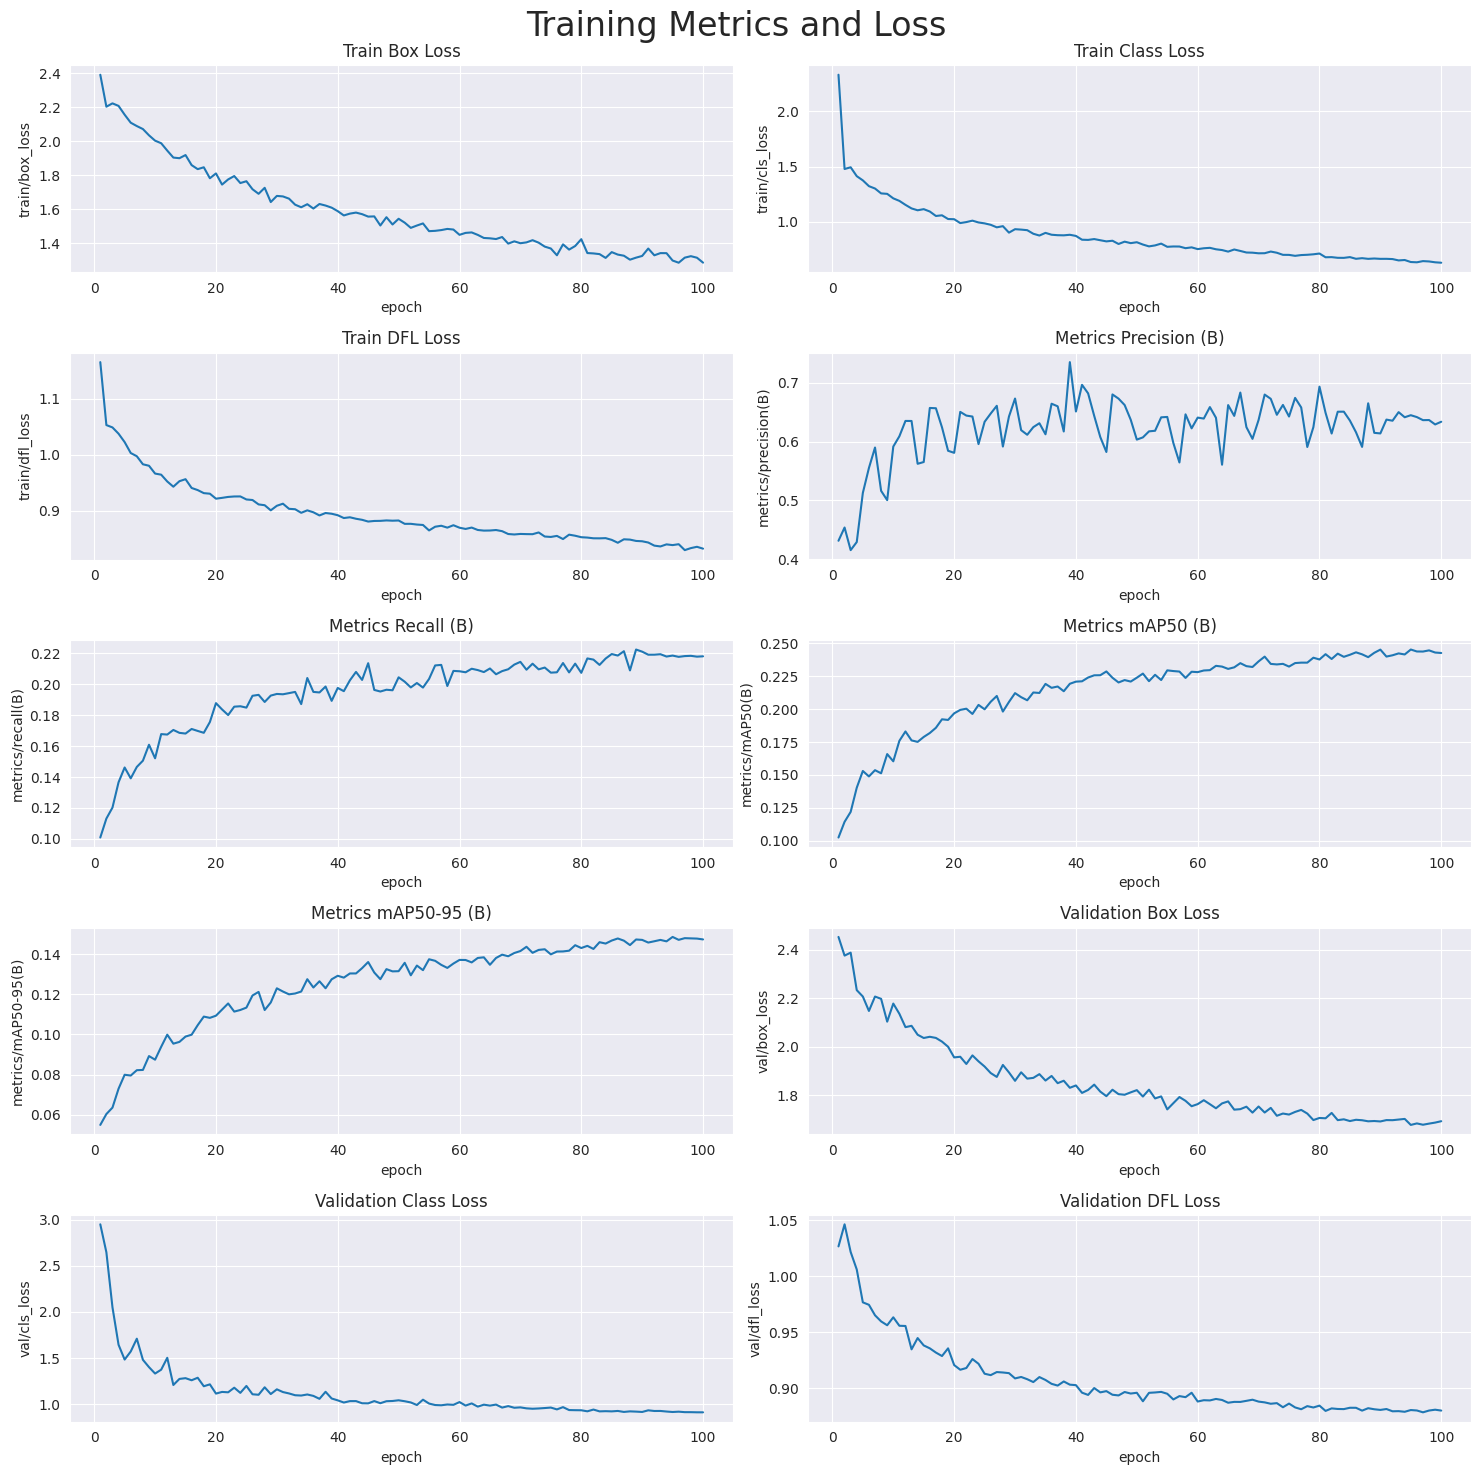

In [10]:
# read in the results.csv file as a pandas dataframe
df = pd.read_csv('/kaggle/working/yolo8/result/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()

# Results

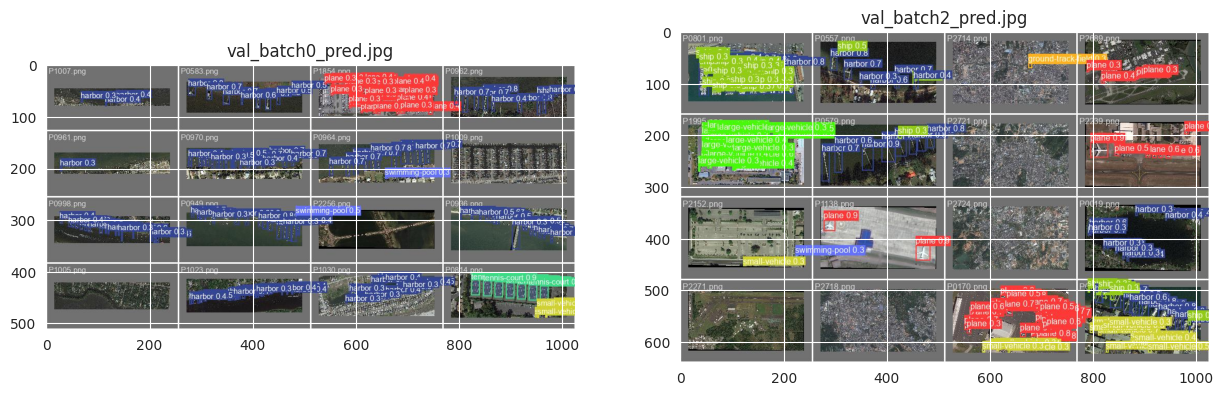

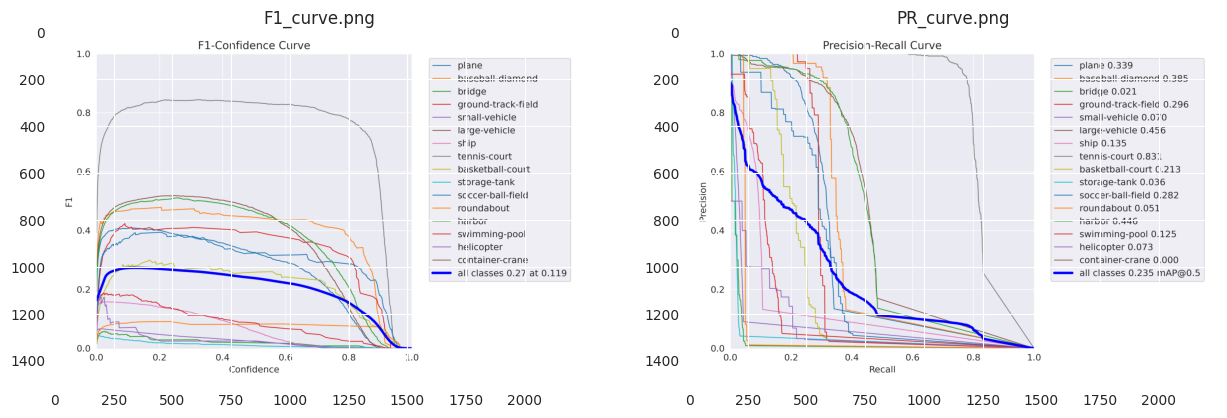

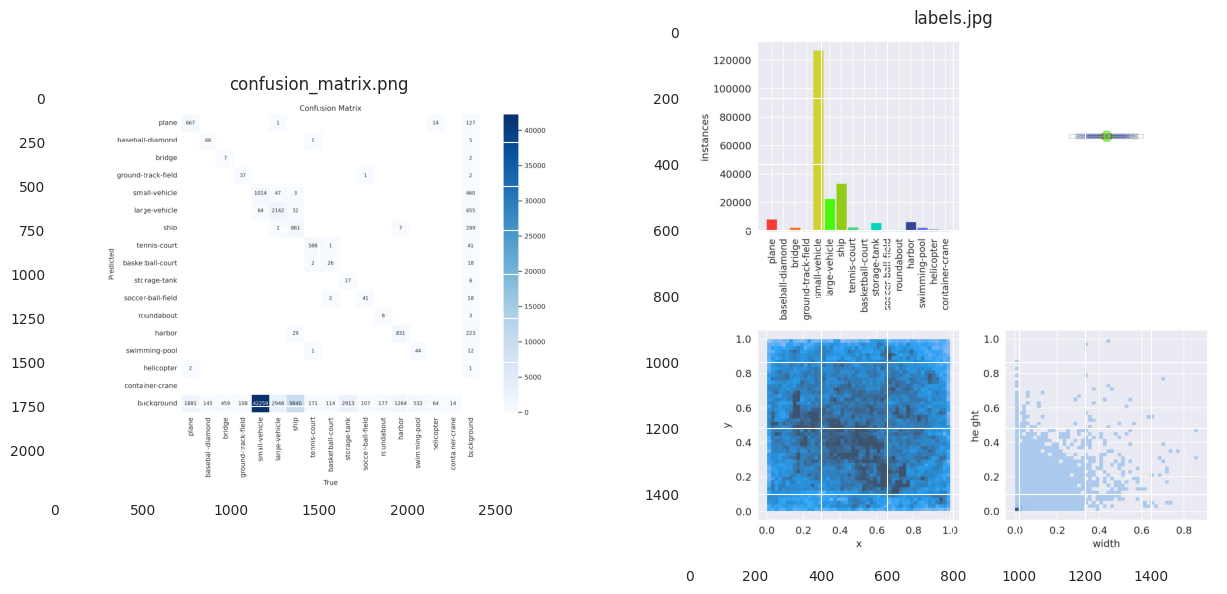

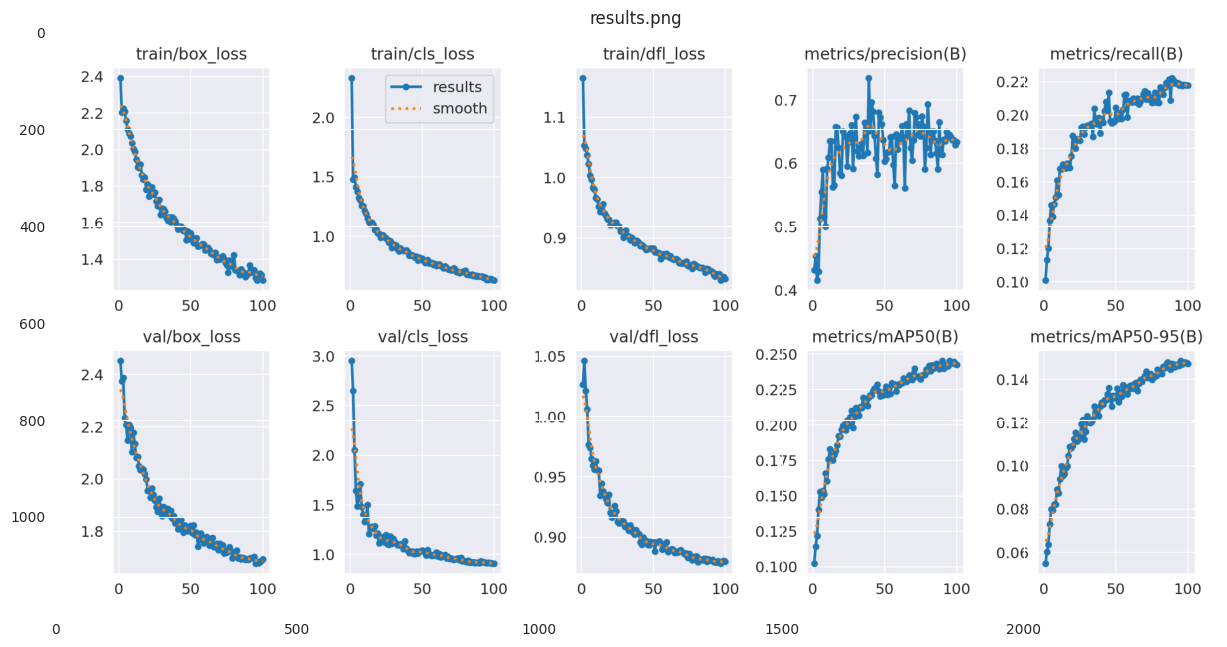

In [11]:
model_path = '/kaggle/working/yolo8/result/'

def plot(ls, size):
    c = 1
    plt.figure(figsize=(15, 10))
    for im in ls:
        plt.subplot(size[0], size[1], c)
        img = plt.imread(model_path + im)
        plt.imshow(img)
        plt.title(im)
        c += 1
    plt.show()

# Visualize images and plots
plot(['val_batch0_pred.jpg', 'val_batch2_pred.jpg'], (1, 2))
plot(['F1_curve.png', 'PR_curve.png'], (1, 2))
plot(['confusion_matrix.png', 'labels.jpg'], (1, 2))
plot(['results.png'], (1, 1))


In [12]:
import pandas as pd

# Read the results.csv file
df = pd.read_csv('/kaggle/working/yolo8/result/results.csv')
df.columns = df.columns.str.strip()

# Extract relevant metrics
precision = df['metrics/precision(B)'].iloc[-1] * 100
recall = df['metrics/recall(B)'].iloc[-1] * 100
mAP50 = df['metrics/mAP50(B)'].iloc[-1] * 100
mAP50_95 = df['metrics/mAP50-95(B)'].iloc[-1] * 100

# Print the metrics
print(f'Precision: {precision:.2f}%')
print(f'Recall: {recall:.2f}%')
print(f'mAP50: {mAP50:.2f}%')
print(f'mAP50-95: {mAP50_95:.2f}%')


Precision: 63.36%
Recall: 21.81%
mAP50: 24.27%
mAP50-95: 14.73%


## test 

In [13]:
Valid_model  = YOLO('/kaggle/working/yolo8/result/weights/best.pt')
metric = Valid_model.val(split = 'test') 

Ultralytics YOLOv8.2.1 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 268 layers, 68138976 parameters, 0 gradients, 257.5 GFLOPs


val: Scanning /kaggle/input/dota-yolo/DOTA/labels/val... 458 images, 0 backgrounds, 0 corrupt: 100%|██████████| 458/458 [00:12<00:00, 37.79it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/dota-yolo/DOTA/labels is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  10%|█         | 3/29 [00:38<06:56, 16.03s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [02:09<00:00,  4.47s/it]


                   all        458      69565      0.637      0.215      0.241      0.146
                 plane        458       2550      0.723      0.335      0.393      0.202
      baseball-diamond        458        213      0.849      0.329      0.387      0.229
                bridge        458        466      0.351     0.0236     0.0233     0.0105
    ground-track-field        458        145      0.821      0.269      0.296      0.213
         small-vehicle        458      43337      0.492     0.0287     0.0693     0.0274
         large-vehicle        458       5139      0.616      0.427      0.454      0.238
                  ship        458      10765      0.586     0.0877      0.135     0.0474
          tennis-court        458        763      0.865      0.796      0.838      0.686
      basketball-court        458        143      0.428      0.238      0.237      0.146
          storage-tank        458       2940      0.609     0.0129     0.0346      0.015
     soccer-ball-fiel

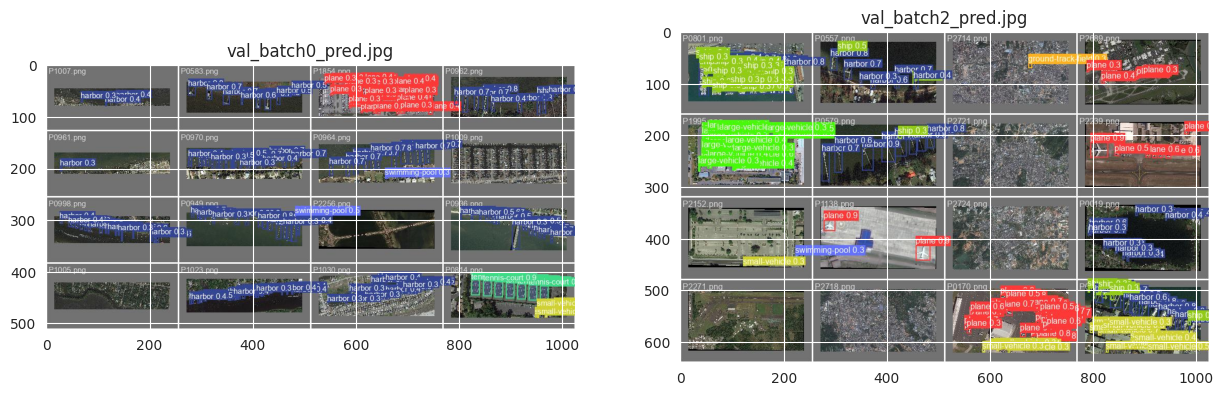

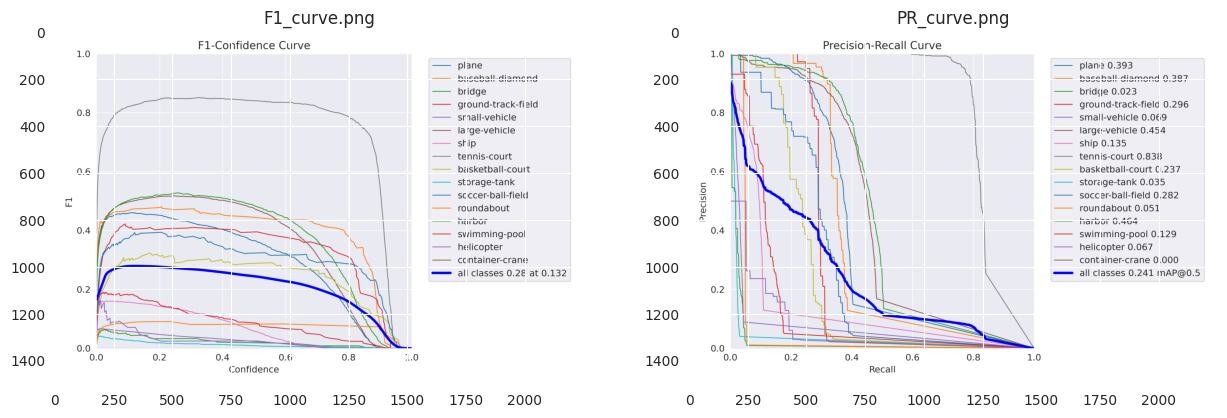

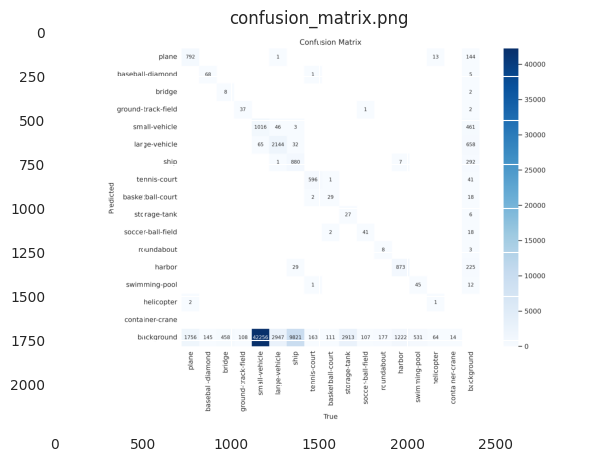

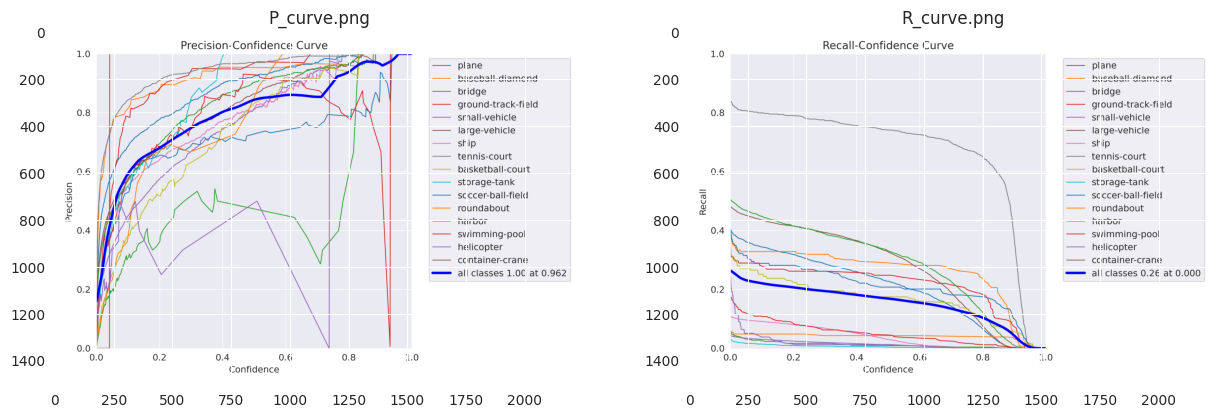

In [14]:
model_path = '/kaggle/working/runs/detect/val/'

def plot(ls, size):
    c = 1
    plt.figure(figsize=(15, 10))
    for im in ls:
        plt.subplot(size[0], size[1], c)
        img = plt.imread(model_path + im)
        plt.imshow(img)
        plt.title(im)
        c += 1
    plt.show()

# Visualize images and plots
plot(['val_batch0_pred.jpg', 'val_batch2_pred.jpg'], (1, 2))
plot(['F1_curve.png', 'PR_curve.png'], (1, 2))
plot(['confusion_matrix.png'], (1, 2))
plot(['P_curve.png','R_curve.png'], (1, 2))

# Prediction

In [15]:
# Function to perform ship detections
def ship_detect(img_path):
    
    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()
    
    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    
    return detect_img


0: 224x192 1 baseball-diamond, 1 ground-track-field, 1 small-vehicle, 12 tennis-courts, 1 soccer-ball-field, 79.0ms
Speed: 1.4ms preprocess, 79.0ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 192)

0: 96x224 10 small-vehicles, 7 tennis-courts, 71.6ms
Speed: 0.9ms preprocess, 71.6ms inference, 1.4ms postprocess per image at shape (1, 3, 96, 224)

0: 224x224 7 tennis-courts, 16.1ms
Speed: 1.7ms preprocess, 16.1ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 224)

0: 160x224 32 ships, 11 harbors, 71.8ms
Speed: 1.1ms preprocess, 71.8ms inference, 1.4ms postprocess per image at shape (1, 3, 160, 224)

0: 224x160 22 large-vehicles, 1 roundabout, 70.7ms
Speed: 1.1ms preprocess, 70.7ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 160)

0: 224x192 7 baseball-diamonds, 1 ground-track-field, 1 soccer-ball-field, 5 swimming-pools, 16.1ms
Speed: 1.1ms preprocess, 16.1ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 192)

0: 224x224 1 base

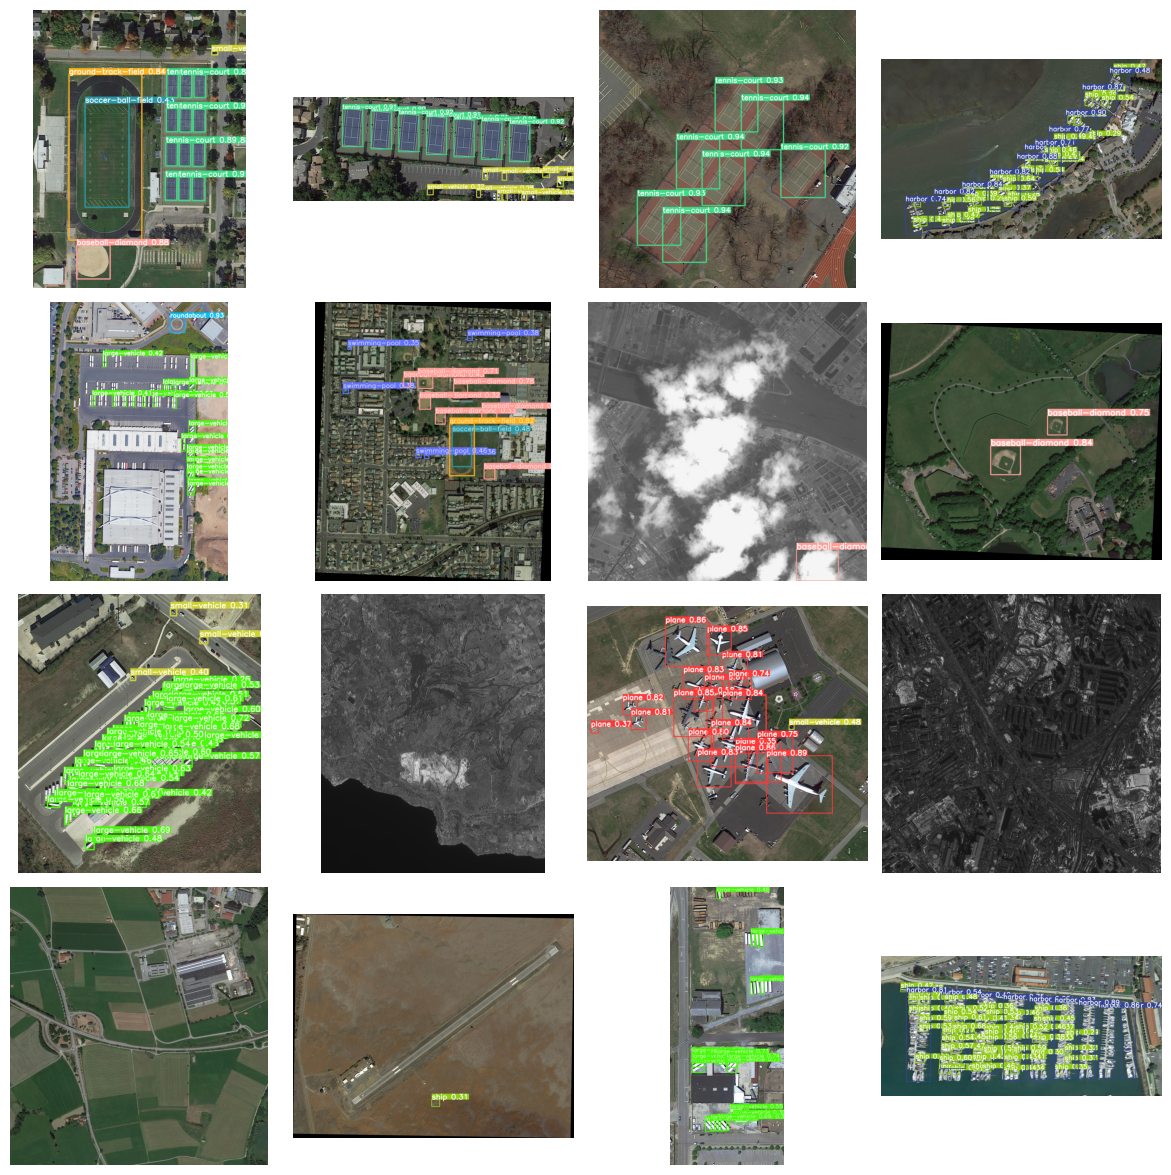

In [16]:
import random

# Define the directory where the custom images are stored
custom_image_dir = '/kaggle/input/dota-yolo/DOTA/images/val'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 16)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):
    
    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4
    
    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = ship_detect(img_path)
    
    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)